### Initial Data Loading and Cleaning

In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#define relative path to dataset
path_train = '../data/external/sign_mnist_train.csv'
path_test = '../data/external/sign_mnist_test.csv'

#define image resolution 
res = (28,28)

In [5]:
#saving data into pandas dataframes 
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)


In [12]:
#printing shape
print(f'Train Shape:{train.shape}')
print(f'Test Shape:{test.shape}')

Train Shape:(27455, 785)
Test Shape:(7172, 785)


The training dataset consists of 27455 28x28 pixel grayscale images, including the associated label. The testing dataset consists of 7172 28x28 images. The label and pixels are split into X and y for both training and testing data. 

In [6]:
#training data 
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

#testing data
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

The below is a function to find the indices of a specified label. 

In [7]:
#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')
        

Creating a dictionary where key is the numeric label in the dataset and value is the corresponding letter. 

In [8]:
#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(list(y_train.unique()))
#dictionary of labels 
labels = dict(zip(numbers,letters))

Inspecting examples for each letter in the dataset. 

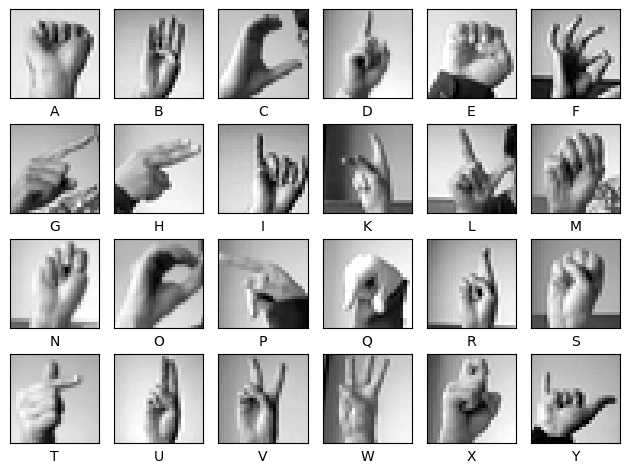

In [16]:
#visualization of dataset 
fix, ax = plt.subplots(4,6)
ax = ax.ravel()
pos = 0 

#loop through each label in dataset 
for label in range(0,26):
    #if label is not included in dataset 
    if label in [9,25]:
        continue
    #find first index of label
    idx = find_indices(y_train,label)[0]
    #display first found image 
    ax[pos].imshow(X_train.iloc[idx,:].values.reshape(res),cmap='gray')
    #set x label as dataset label
    ax[pos].set(xlabel=labels[label])
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

Looking at specific letters

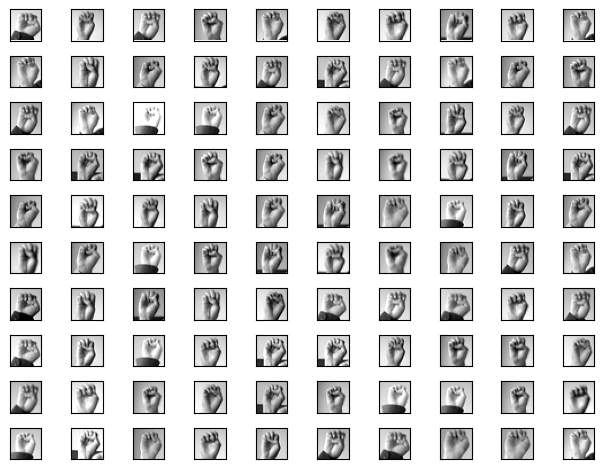

In [16]:
#visualization of dataset 
fix, ax = plt.subplots(10,10)
ax = ax.ravel()
pos = 0 

label = 4

index = find_indices(y_train,label)

#loop through each label in dataset 
for i, idx in enumerate(index):
    if i >= 100:
        break
    #display first found image 
    ax[pos].imshow(X_train.iloc[idx,:].values.reshape(res),cmap='gray')
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

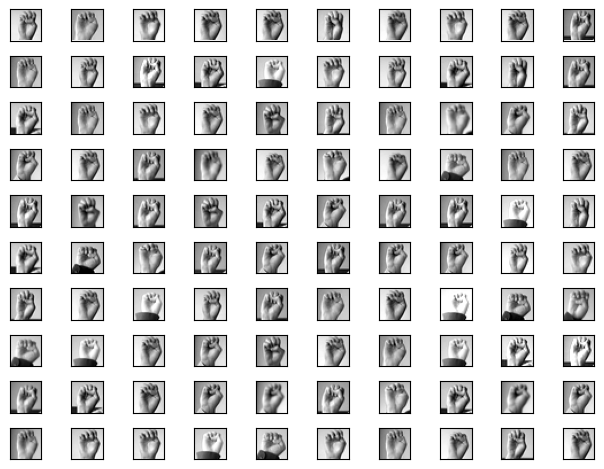

In [17]:
#visualization of dataset 
fix, ax = plt.subplots(10,10)
ax = ax.ravel()
pos = 0 

label = 4

index = find_indices(y_test,label)

#loop through each label in dataset 
for i, idx in enumerate(index):
    if i >= 100:
        break
    #display first found image 
    ax[pos].imshow(X_test.iloc[idx,:].values.reshape(res),cmap='gray')
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

No additional data loading and cleaning steps required for this dataset. 